<a href="https://colab.research.google.com/github/Yilalu/CMSC320_HW1_Summer2024/blob/main/Geremew_CMSC320_HW2_Part_1_HypTestings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 2 - Part 1: Hypothesis Testing**
# Due Date: June 18th, 2024, by 11:59 PM
### *Late Due Date with a 5% LATE PENALTY: June 19th, 2024, by 11:59 PM*

### **DO NOT REMOVE ANY PART OF ANY OF THE QUESTIONS OR YOU LOSE CREDIT**
### **REMEMBER TO SHOW ALL CODE OUTPUT (NO CREDIT OTHERWISE)**

##Q1) (14 POINTS) Hypothesis Tests and P_value

**TASK:** For the next 5 problems, please describe when you would use each hypothesis test



*   Chi-Squared Test
*   Z test
*   T test
*   Mann-Whitney U Test
*   Anova




**TASK 1.1** (2 POINTS): **Chi-Squared Test**



The Chi-Squared Test is used when we want to test the relationship between two categorical variables. It's often used for testing the independence of two variables.

**TASK 1.2**   (2 POINTS): **Z-Test**



It's used for testing the mean of a single sample against a known mean or for comparing the means of two samples.
It is used when we have a large sample size such that for n > 30 and we know the population standard deviation (σ) or can make a reasonable assumption about it.

**TASK 1.3**   (2 POINTS): **T-Test**



We can use the T-Test for continuous data obtained from a random sample that follows a normal distribution.
It is used when we have a smaller sample size such that for n < 30 or when we don't know the population standard deviation (σ) and must estimate it from the sample


**TASK 1.4**   (2 POINTS): **Man-Whitney U Test**



It is used to compare two independent groups when the data do not meet the assumptions of normality required for a t-test.

**TASK 1.5**   (2 POINTS): **ANOVA Test**



ANOVA test is used when we want to compare the means of more than two groups.

We use a this test:

Null hypothesis: There is no difference between any of the groups

Alternative hypothesis: There is a difference between at least one of the groups

**TASK 1.6** (4 POINTS):
Explain the statistical interpretation of a p_value. Be sure to **explain beyond just rejecting or failing to reject the null hypothesis**. You also need to **think** about what is **P-Value**, what is the **true statistical meaning of P-Value**.

The p-value is the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct.

Smaller p-values indicate stronger evidence against the null hypothesis.
Compare the test statistic with the critical region using p-value:

If p-value ≤ α, reject the null hypothesis.

If p-value > α, fail to reject the null hypothesis.

A low p-value suggests that the observed data is unlikely under the null hypothesis, providing stronger evidence against it. We commonly use a threshold, often 0.05 or 0.01, to determine statistical significance. If the p-value is below those threshold, the null hypothesis is rejected, indicating that the results are significant.



##*Q2)*  (2 POINTS) Create a dataframe and Display

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Addtional imports for analysis
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

### We are creating a dataframe named "df", read the "theft_data.csv" file into it and display the dataframe.

In [ ]:
# ANSWER STARTING HERE
df = pd.read_csv("theft_data.csv")
df

,Item ID;Category;Location;Cost of Item;Visibility;Time of Theft;Stolen;Recovery Status
0,1;Jewelry;Mall D;1492;Low;Morning;No;N/A
1,2;Electronics;Mall C;57;Medium;Night;Yes;Recov...
2,3;Clothing;Mall A;342;High;Midnight;No;N/A
3,4;Personal Accessories;Mall A;330;Medium;After...
4,5;Antiques;Mall D;7496;Medium;Midnight;Yes;Rec...
...,...
295,296;Jewelry;Mall B;113;High;Morning;Yes;Recovered
296,297;Jewelry;Mall A;792;Medium;Midnight;No;N/A
297,298;Clothing;Mall A;674;Low;Evening;No;N/A
298,299;Clothing;Mall A;990;High;Midnight;Yes;Missing


### Notice how all the columns are mushed together above?

**TASK 2.1 (2 POINTS):** Find a way to separate them. Make changes to the above code for displaying the dataframe.

hints: https://www.analyticsvidhya.com/blog/2021/04/delimiters-in-pandas-read_csv-function/


In [ ]:
# ANSWER STARTING HERE
df = pd.read_csv("theft_data.csv", sep=';')
df

,Item ID,Category,Location,Cost of Item,Visibility,Time of Theft,Stolen,Recovery Status
0,1,Jewelry,Mall D,1492,Low,Morning,No,NaN
1,2,Electronics,Mall C,57,Medium,Night,Yes,Recovered
2,3,Clothing,Mall A,342,High,Midnight,No,NaN
3,4,Personal Accessories,Mall A,330,Medium,Afternoon,Yes,Recovered
4,5,Antiques,Mall D,7496,Medium,Midnight,Yes,Recovered
...,...,...,...,...,...,...,...,...
295,296,Jewelry,Mall B,113,High,Morning,Yes,Recovered
296,297,Jewelry,Mall A,792,Medium,Midnight,No,NaN
297,298,Clothing,Mall A,674,Low,Evening,No,NaN
298,299,Clothing,Mall A,990,High,Midnight,Yes,Missing


#*Q3)*  (6 POINTS) Next, Apply Hypothesis Testing

- Lets try to **find relationships in this data** through a hypothesis test. For this example, we will be using a Chi-Squared Test

- First we must chose a null hypothese, or a statement that there is no effect between different variables, that serves as a default assumption.

- Then we chose an alternative hypothesis, or a statement that suggests that there is a correlation between different variables  

- **For the questions below assume that the alpha value is 0.05**

## For this Example - **Given the following:**

- $H_{0}$: The category of the item does not have an effect on the likelyhood of the item being stolen

- $H_{A}$: The category of the item does have an effect on the likelyhood of the item being stolen

Our plan is to apply Chi-Squared Test.
For that first, we will probably want a contingency table and a way to create one. Here is a helpful documentation for the library we'll be using
https://docs.scipy.org/doc/scipy/reference/stats.html

**TASK 3.1 (2 POINTS)**: Create a contingency table and display it.

In [ ]:
# ANSWER STARTING HERE
contingency_table = pd.crosstab(df['Category'], df['Stolen'])
contingency_table

Stolen,No,Yes
Category,,
Antiques,21,20
Art,21,24
Clothing,12,17
Collectibles,13,23
Electronics,16,23
Instruments,12,23
Jewelry,21,20
Personal Accessories,20,14


**TASK 3.2 (2 POINTS): Explain below why we are considering the use of
chi-squared test here.**

The Chi-Squared Test is used to determine whether there is a significant association between two categorical variables. In this case, we are interested in examining the relationship between the category of an item and the likelihood of it being stolen.

We aim to test whether the likelihood of an item being stolen is independent of its category. The null hypothesis (H0) states that the category of the item does not affect its likelihood of being stolen, while the alternative hypothesis (HA) suggests that there is an effect.

**TASK 3.3 (2 POINTS): Create a plot showing the relationship between the item categories, and the counts of it being stolen**

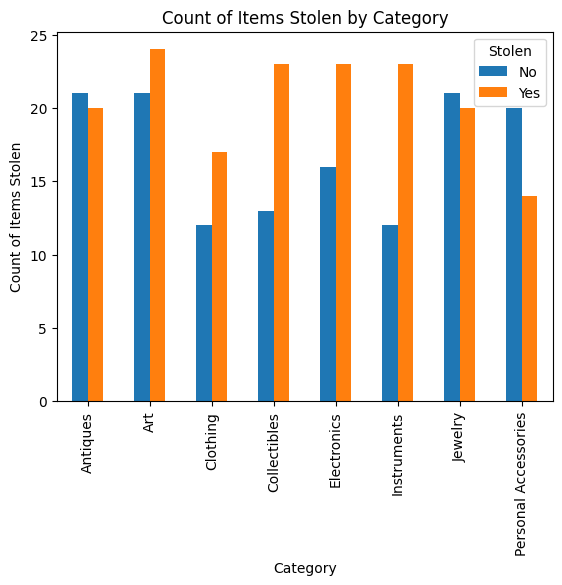

In [ ]:
# ANSWER STARTING HERE
contingency_table.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count of Items Stolen')
plt.title('Count of Items Stolen by Category')
plt.show()

#Q4) (5 POINTS) Use the chi2_contingency() function

Next we want to conduct the chi-squared test using the chi2_contingency() function


**TASK: 4.1 (2 POINTS):** Display P-Value by applying the chi-squared test using the chi2_contingency() function

In [ ]:
# ANSWER STARTING HERE
p_value = chi2_contingency(contingency_table)[1]
print(p_value)

0.4175580288155116


**TASK: 4.2  (3 POINTS): Based on the obtained P- Value, determine whether to reject or fail to reject the null hypothesis. Explain Why?**

Since the p-value approximately (0.418) is much greater than the significance level of 0.05, we fail to reject the null hypothesis. The p-value indicates that there is no significant evidence to suggest that the category of the item affects the likelihood of it being stolen. Therefore, we fail to reject the null hypothesis and conclude that there is no statistically significant relationship between the category of the item and the likelihood of it being stolen.

#*Q5)* (3 POINTS) Next, Create a New Hypothesis




**Now create a new hypothesis test on "whether the visibilty of an item has a correlation with the item being stolen"**

- **For the questions below assume that the alpha value is 0.05**

**TASK 5.1  (3 POINTS)**: Write down Null Hypothesis and Alternate Hypothesis for an Anova Test below.

$H_{0}$: The visibility of an item does not have an effect on the likelihood of the item being stolen.

$H_{A}$: The visibility of an item does have an effect on the likelihood of the item being stolen.

#*Q6)* (7 POINTS) Apply ANOVA Test


# **Now we conduct an Anova test and find the p_val**

**TASK 6.1 (2 POINTS)**: Display the P - Value by applying ANOVA Test

In [ ]:
# ANSWER STARTING HERE
df['Stolen'] = df['Stolen'].map({'Yes': 1, 'No': 0})
low_visibility = df[df['Visibility'] == 'Low']['Stolen']
medium_visibility = df[df['Visibility'] == 'Medium']['Stolen']
high_visibility = df[df['Visibility'] == 'High']['Stolen']

# Perform ANOVA
f_statistic, p_value = f_oneway(low_visibility, medium_visibility, high_visibility)

print("P-value:", p_value)


P-value: 0.23795050537928658


**TASK 6.2 \(2 POINTS)**: Create a graph using the matplotlib that you think would be good in showing the realtion between the visibility and the item being stolen below


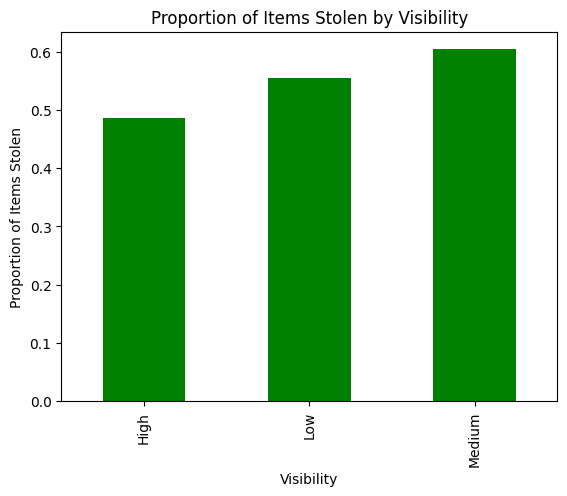

In [ ]:
# ANSWER STARTING HERE
# a bar plot showing the relationship between visibility and the likelihood of being stolen
visibility_counts = df.groupby('Visibility')['Stolen'].mean()

# Plot the data
visibility_counts.plot(kind='bar', color='green')
plt.xlabel('Visibility')
plt.ylabel('Proportion of Items Stolen')
plt.title('Proportion of Items Stolen by Visibility')
plt.show()

**TASK 6.3** (3 POINTS): Based on the **obtained P-Value**, determine whether to **reject** or **fail to reject** the null hypothesis. **Explain, why?**

A high p-value (greater than 0.05) suggests that the observed data is consistent with the null hypothesis. In this case, the p-value of approximately 0.238 indicates that there is no significant evidence to suggest that the visibility of an item affects the likelihood of it being stolen. Therefore, we fail to reject the null hypothesis and conclude that there is no statistically significant relationship between the visibility of an item and the likelihood of it being stolen

#*Q7)* (2 POINTS) Post Hoc Tests

**TASK 7.1** (2 POINTS): Answer below, why might we need a **Post Hoc Tests** in this **scenario**?

While the ANOVA test tells us whether there is a statistically significant difference between the groups, it does not tell us which specific groups are different from each other. Post hoc tests are necessary to determine which pairs of groups (e.g., Low, Medium, High visibility) show significant differences in the likelihood of items being stolen.

When multiple comparisons are made, the chance of committing a Type I error (false positive) increases. Post hoc tests apply corrections (such as the Bonferroni correction) to control for this increased risk, ensuring that the conclusions about which groups differ are statistically valid.

In our case, the above shows ANOVA test shows that there is not signigicant relationship between the visbility of an item and the likelihood of it being stolen, so we do not need POST Hoc test for now because we already failed to reject the null hypothesis.

#*Q8)* (11 POINTS) CONDUCT YOUR OWN HYPOTHESIS TEST

**Conduct your own hypothesis test using the given "Thief Dataset". You can choose any of the hypothesis tests given in Q1 (listed below again):**

*   Chi-Squared Test
*   Z test
*   T test
*   Mann-Whitney U Test
*   Anova


This time we do not provide you any null or alternative hypothesis. You need to write down by yourself based on the given dataset.
- **For the questions below assume that the alpha value is 0.05**

**TASK 8.1** (3 POINTS): Write down the **Null** and **Alternative Hypothesis** below.

I chose Chi-Squared Test to determine if there is a significant association between the location of the item and whether the item was stolen.


$H_{0}$: The location of the item does not have an effect on the likelihood of the item being stolen.

$H_{A}$: The location of the item does have an effect on the likelihood of the item being stolen.

In [ ]:
df.groupby('Location')['Stolen'].value_counts()

Location  Stolen
Mall A    1         49
          0         39
Mall B    1         36
          0         25
Mall C    1         41
          0         33
Mall D    0         39
          1         38
Name: count, dtype: int64

**TASK 8.2** (2 POINTS): **Create a plot** using the matplotlib that you think would be good in showing the **relationship between your hypothesis**.

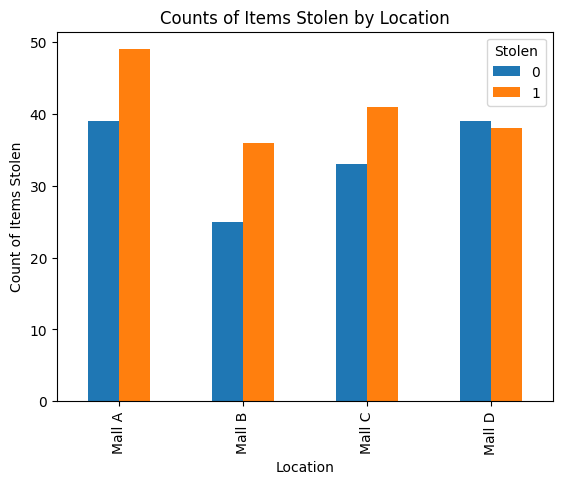

In [ ]:
# ANSWER STARTING HERE
pd.crosstab(df['Location'], df['Stolen']).plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Count of Items Stolen')
plt.title('Counts of Items Stolen by Location')
plt.show()

**TASK 8.3** (3 POINTS): Find the **P-value** of the **hypothesis test** below

In [ ]:
# ANSWER STARTING HERE
p_value = chi2_contingency(pd.crosstab(df['Location'], df['Stolen']))[1]
print(p_value)

0.7063189681624472


**TASK 8.4** (3 POINTS): Based on the **obtained P-Value**, determine whether to **reject** or **fail to reject** the null hypothesis. **Explain, why?**

Since the p-value approximately (0.706) is much greater than the significance level of 0.05, we fail to reject the null hypothesis. The p-value indicates that there is no significant evidence to suggest that the location of the item affects the likelihood of it being stolen. Therefore, we fail to reject the null hypothesis and conclude that there is no statistically significant relationship between the location of the item and the likelihood of it being stolen.